In [4]:
import zipfile

zip_files = {
    "agedetectiontrain.zip": "agedetection_train",
    "agedetectiontest.zip": "agedetection_test"
}

for zip_name, folder_name in zip_files.items():
    with zipfile.ZipFile(zip_name, 'r') as zip_ref:
        zip_ref.extractall(folder_name)
    print(f"Extracted {zip_name} to folder: {folder_name}/")


Extracted agedetectiontrain.zip to folder: agedetection_train/
Extracted agedetectiontest.zip to folder: agedetection_test/


In [6]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
import imageio.v3 as imageio # To read images
from PIL import Image # For image resizing 

In [8]:
# Reading the data 
train = pd.read_csv('agedetection_train/train.csv')
test = pd.read_csv('agedetection_test/test.csv')

In [9]:
# Specifying all the parameters we will be using in our network 
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
epochs = 5
batch_size = 128

In [10]:
model = Sequential ([
    InputLayer(shape = input_num_units),
    Flatten(),
    Dense(units = hidden_num_units, activation = 'relu'),
    Dense(units = output_num_units, activation = 'softmax' )
])

In [11]:
# Printing model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     1,536,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,538,003 (5.87 MB)

 Trainable params: 1,538,003 (5.87 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compiling and training the network 
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
image_dir = 'agedetection_train/Train'  
image_size = (32, 32)

train_x = [] # This will store all the image arrays 
train_y = [] # This will store all the class labels 
print (train.columns)

for i, row in train.iterrows():
    img_path = os.path.join(image_dir, row['ID'])
    label = row['Class']

    # Load image and resize
    img = Image.open(img_path).resize(image_size)
    img = np.array(img)

    train_x.append(img)
    train_y.append(label)

# Convert to numpy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)

Index(['ID', 'Class'], dtype='object')


In [14]:
# Normalize pixel values to [0, 1]
train_x = train_x / 255.0

# Convert labels to numeric classes
le = LabelEncoder()
train_y = le.fit_transform(train_y)
train_y = to_categorical(train_y)

In [16]:
model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: 0.8001
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6273 - loss: 0.8053
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6335 - loss: 0.7982
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6424 - loss: 0.7862
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6484 - loss: 0.7724


In [17]:
# Training model along with validation data
model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, verbose = 1, validation_split = 0.2)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6454 - loss: 0.7773 - val_accuracy: 0.6394 - val_loss: 0.7780
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6579 - loss: 0.7699 - val_accuracy: 0.6238 - val_loss: 0.8054
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6552 - loss: 0.7646 - val_accuracy: 0.6441 - val_loss: 0.7702
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6541 - loss: 0.7596 - val_accuracy: 0.6554 - val_loss: 0.7535
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6622 - loss: 0.7508 - val_accuracy: 0.6703 - val_loss: 0.7495


In [26]:
image_dir = 'agedetection_test'
image_size = (32, 32)
# Read the CSV
test = pd.read_csv(os.path.join(image_dir, 'test.csv'))
# Determine where images are actually stored
# Look for common subfolders
subfolders = os.listdir(image_dir)
image_subfolder = None
for folder in subfolders:
    full_path = os.path.join(image_dir, folder)
    if os.path.isdir(full_path) and any(fname.lower().endswith(('.jpg', '.png')) for fname in os.listdir(full_path)):
        image_subfolder = folder
        break
if image_subfolder:
    print(f"Found images in subfolder: {image_subfolder}")
else:
    print("Warning: No image subfolder found. Trying main folder.")
    image_subfolder = ''  # Try using image_dir directly
# Load and preprocess test images
test_x = []
for i, row in test.iterrows():
    img_filename = row['ID']
    if image_subfolder:
        img_path = os.path.join(image_dir, image_subfolder, img_filename)
    else:
        img_path = os.path.join(image_dir, img_filename)

    if not os.path.exists(img_path):
        print(f"Missing file: {img_path}")
        continue  # Skip if missing

    try:
        img = Image.open(img_path).resize(image_size)
        img = np.array(img)
        test_x.append(img)
    except Exception as e:
        print(f"Error loading image {img_filename}: {e}")
# Convert and normalize
test_x = np.array(test_x) / 255.0

Found images in subfolder: Test


In [27]:
# Predict probabilities
pred_probs = model.predict(test_x)
# Convert to class indices
pred_indices = np.argmax(pred_probs, axis=1)
# Inverse transform to get original class labels 
pred_labels = le.inverse_transform(pred_indices)
# Add predictions to the test DataFrame (match rows properly)
test = test.iloc[:len(pred_labels)]  # Ensure lengths match
test['Class'] = pred_labels
# Save to CSV
test.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' saved.")

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Submission file 'submission.csv' saved.


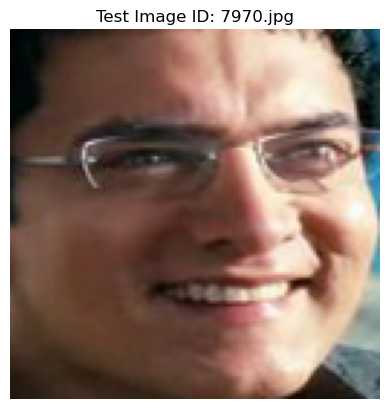

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step
Predicted Age Group: MIDDLE


In [29]:
# Choose an index from the test set (change idx to inspect different images)
idx = 2481
# Get the image filename from test dataframe
img_name = test.ID[idx]
# Read and resize the image
img_path = os.path.join('agedetection_test', 'Test', img_name)
img = imageio.imread(img_path)
img_resized = np.array(Image.fromarray(img).resize((128, 128)))  # for display
# Show the image
plt.imshow(img_resized)
plt.axis('off')
plt.title(f"Test Image ID: {img_name}")
plt.show()
# Make predictions
pred_probs = model.predict(test_x)
pred_classes = np.argmax(pred_probs, axis=1)
# Decode predicted class
pred_label = le.inverse_transform([pred_classes[idx]])[0]
# Print the prediction
print("Predicted Age Group:", pred_label)